In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent
emp_title,51457,5.798762
annual_inc,4,0.000451
desc,761350,85.797613
title,151,0.017016
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303
open_acc,29,0.003268


In [4]:
df1 = df.dropna(axis=1, thresh=int(0.80*len(df)))

In [5]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [6]:
df_LC = df1.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
df_LC.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
dtype: object

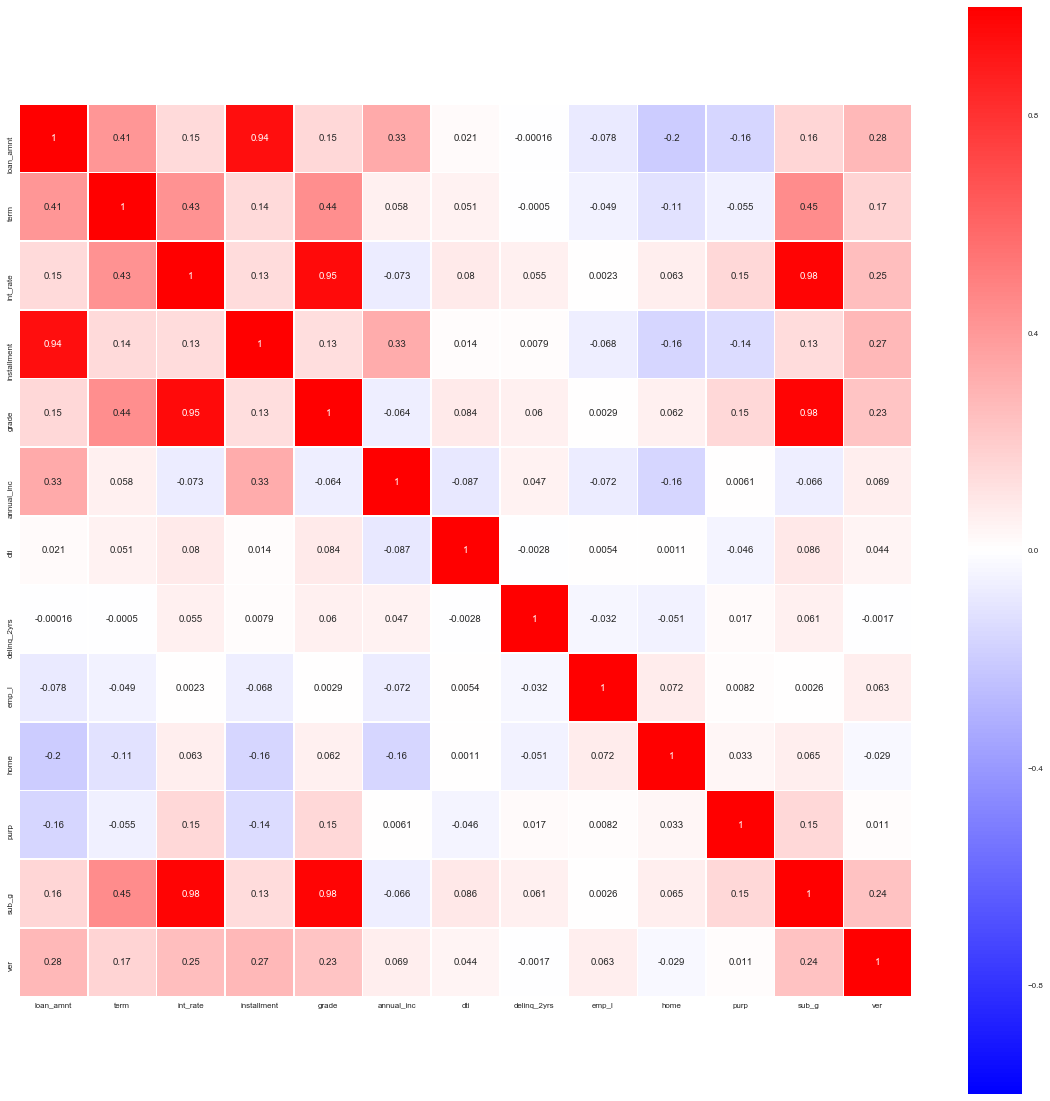

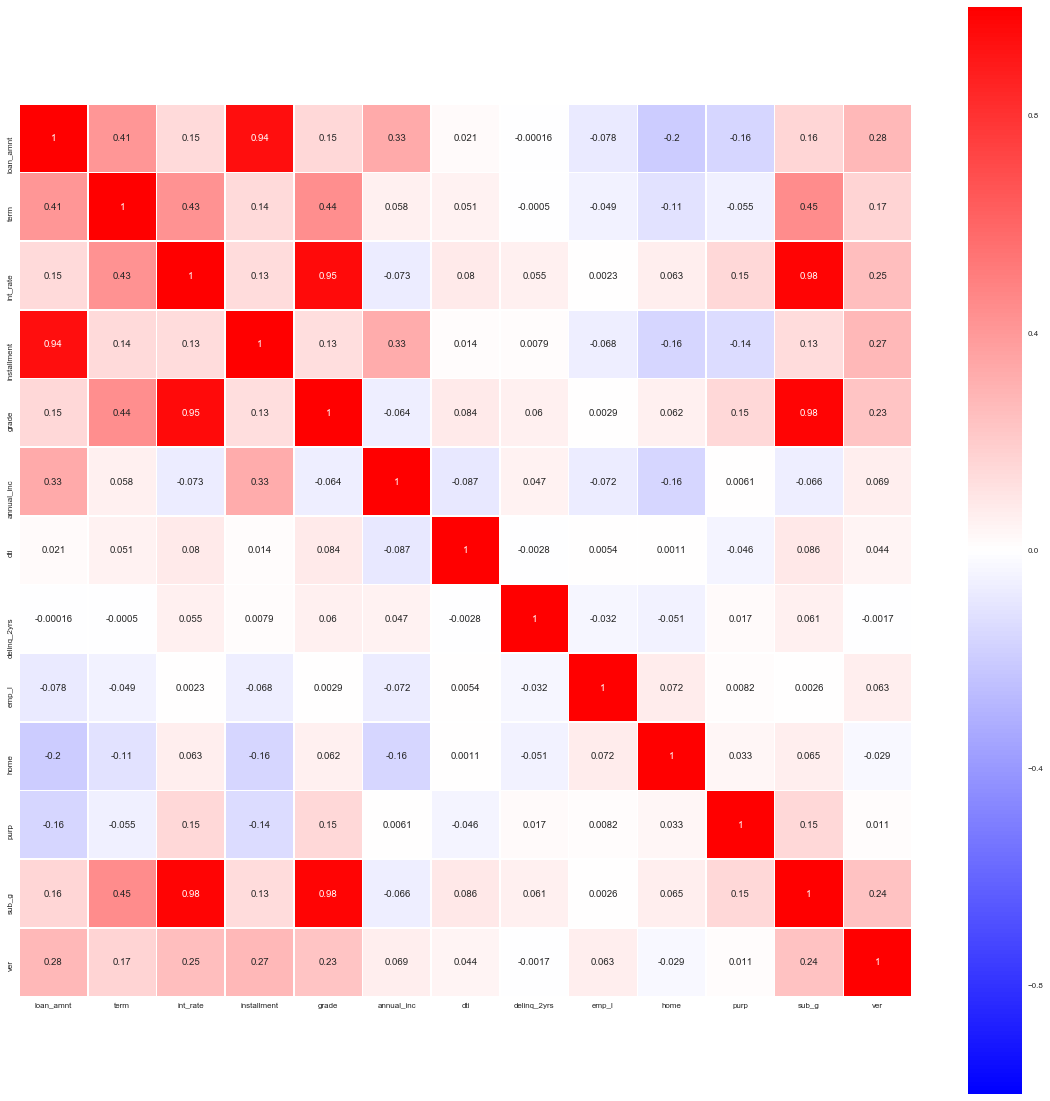

In [8]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.show()

In [9]:
df_LC.drop(['installment','grade','sub_grade','verification_status','term']
           , axis=1, inplace = True)


In [10]:
dflc_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})
dflc_null[dflc_null['Count'] > 0]

,Count,Percent
annual_inc,4,0.000451
delinq_2yrs,29,0.003268


In [11]:
df_LC.dropna(axis=0)

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,5000.0,10.65,10+ years,RENT,24000.00,credit_card,27.65,0.0,Fully Paid
1,2500.0,15.27,< 1 year,RENT,30000.00,car,1.00,0.0,Charged Off
2,2400.0,15.96,10+ years,RENT,12252.00,small_business,8.72,0.0,Fully Paid
3,10000.0,13.49,10+ years,RENT,49200.00,other,20.00,0.0,Fully Paid
4,3000.0,12.69,1 year,RENT,80000.00,other,17.94,0.0,Current
5,5000.0,7.90,3 years,RENT,36000.00,wedding,11.20,0.0,Fully Paid
6,7000.0,15.96,8 years,RENT,47004.00,debt_consolidation,23.51,0.0,Current
7,3000.0,18.64,9 years,RENT,48000.00,car,5.35,0.0,Fully Paid
8,5600.0,21.28,4 years,OWN,40000.00,small_business,5.55,0.0,Charged Off
9,5375.0,12.69,< 1 year,RENT,15000.00,other,18.08,0.0,Charged Off


In [12]:
df_LC['loan_status'].unique()


array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

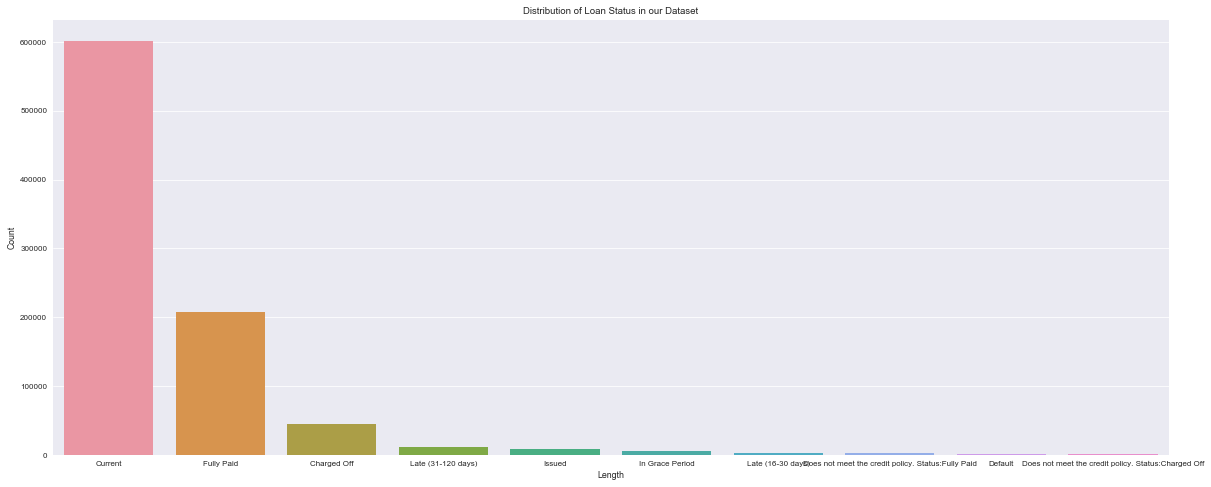

In [13]:
m =df_LC['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()


In [14]:
df_LC = df_LC[df_LC.loan_status != 'Current']
df_LC = df_LC[df_LC.loan_status != 'In Grace Period']
df_LC = df_LC[df_LC.loan_status != 'Late (16-30 days)']
df_LC = df_LC[df_LC.loan_status != 'Late (31-120 days)']
df_LC = df_LC[df_LC.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df_LC = df_LC[df_LC.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df_LC = df_LC[df_LC.loan_status != 'Issued']

In [15]:
df_LC['loan_status'] = df_LC['loan_status'].replace({'Charged Off':'Default'})
df_LC['loan_status'].value_counts()

Fully Paid    207723
Default        46467
Name: loan_status, dtype: int64

In [16]:
df_LC.loan_status=df_LC.loan_status.astype('category').cat.codes
df_LC.delinq_2yrs=df_LC.delinq_2yrs.astype('category').cat.codes
df_LC.head()
df_LC['loan_status'].value_counts()

1    207723
0     46467
Name: loan_status, dtype: int64

In [17]:
df_LC.dtypes


loan_amnt         float64
int_rate          float64
emp_length         object
home_ownership     object
annual_inc        float64
purpose            object
dti               float64
delinq_2yrs          int8
loan_status          int8
dtype: object

In [18]:
numerical = df_LC.columns[df_LC.dtypes == 'float64']
for i in numerical:
    if df_LC[i].min() > 0:
        transformed, lamb = boxcox(df_LC.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_LC.loc[df[i].notnull(), i] = transformed

In [19]:
df_LC = pd.get_dummies(df_LC, drop_first=True)


In [20]:
traindata, testdata = train_test_split(df_LC, stratify=df_LC['loan_status'],test_size=.4, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)


In [21]:
sc = StandardScaler()
Xunb = traindata.drop('loan_status', axis=1)
yunb = traindata['loan_status']
numerical = Xunb.columns[(Xunb.dtypes == 'float64') | (Xunb.dtypes == 'int64')].tolist()
Xunb[numerical] = sc.fit_transform(Xunb[numerical])

In [22]:
yunb.shape


(152514L,)

In [23]:
def createROC(models, X, y, Xte, yte):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(yte, models[i].predict_proba(Xte)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], Xunb - np.min(Xunb) + 1,
                                    yunb, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


('LDA', array([ 0.81769901,  0.8170463 ,  0.81782953]), 0.81752494938512543)
('RF', array([ 0.81130628,  0.81250246,  0.81422979]), 0.81267951088760804)
('LR', array([ 0.81752198,  0.81724301,  0.81777052]), 0.81751183660870685)
('MNB', array([ 0.81718759,  0.81720367,  0.81720007]), 0.81719710985534844)


In [26]:
Xte = testdata.drop('loan_status', axis=1)
yte = testdata['loan_status']
numerical = Xte.columns[(Xte.dtypes == 'float64') | (Xte.dtypes == 'int64')].tolist()
Xte[numerical] = sc.fit_transform(Xte[numerical])

In [27]:
tp_unbalset, fp_unbalset = createROC(models, Xunb - np.min(Xunb) + 1, yunb, Xte - np.min(Xte) + 1, yte)

In [28]:
model =  LogisticRegression(C=1)
model.fit(Xunb, yunb)
predict = model.predict(Xte)

In [29]:
m = yte.to_frame()
m['loan_status'].value_counts()

1    83089
0    18587
Name: loan_status, dtype: int64

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

(0.0, 2.0, 0.0, 2.0)

In [31]:
fp, tp, threshold = roc_curve(yte, model.predict_proba(Xte)[:,1])

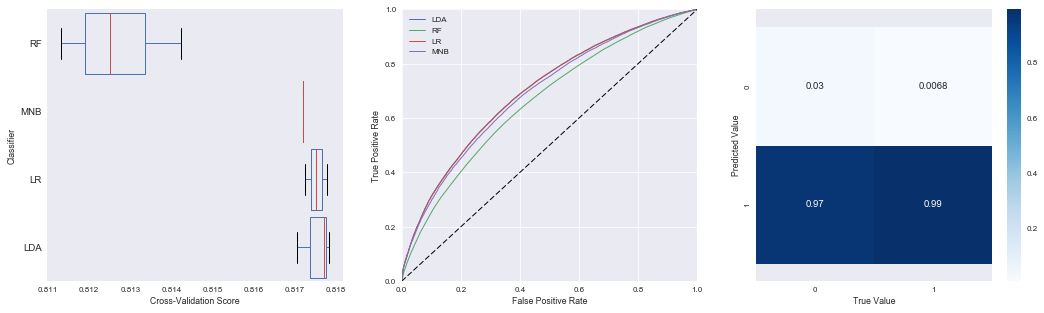

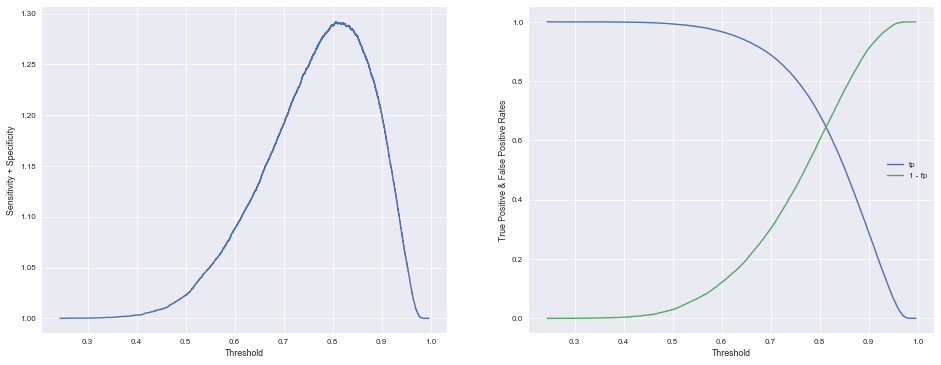

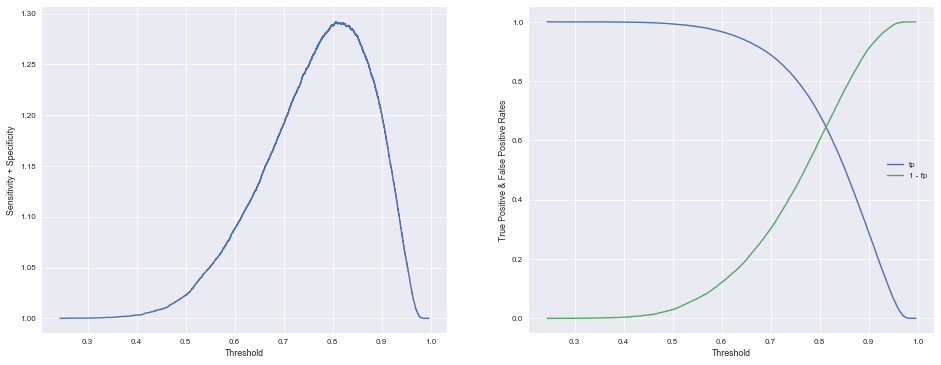

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')
plt.show()

In [34]:
function = tp + (1 - fp)
index = np.argmax(function)

optimal_threshold = threshold[np.argmax(function)]
print('optimal threshold:', optimal_threshold)

('optimal threshold:', 0.8064728735053841)


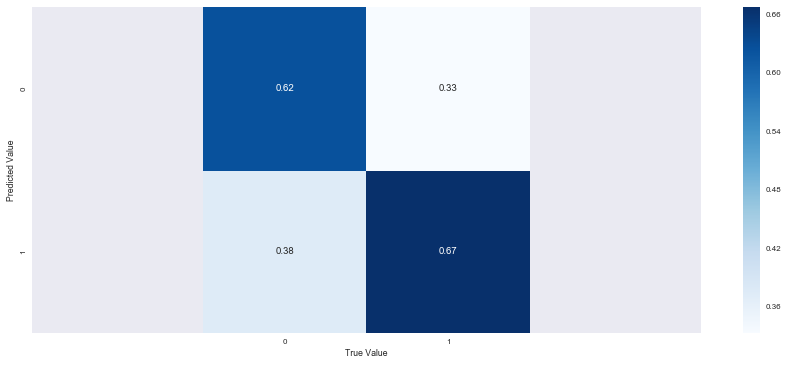

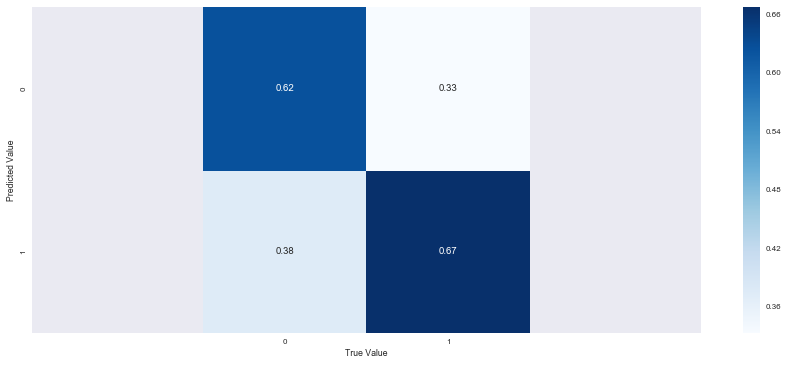

In [36]:
predict = model.predict_proba(Xte)[:,1]
predict = np.where(predict >= optimal_threshold, 1, 0)

fig, axes = plt.subplots(figsize=(15,6))

cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')
plt.show()

In [37]:
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n=len(y_default), random_state=17) ##chosing equal amount of 1's

##creating a new dataframe for balanced set
data = y_default.append(n_paid) 

##creating the independent and dependent array
Xbal = data.drop('loan_status', axis=1)
ybal = data['loan_status']

In [38]:
## scaling it again
numerical = Xbal.columns[(Xbal.dtypes == 'float64') | (Xbal.dtypes == 'int64')].tolist()
Xbal[numerical] = sc.fit_transform(Xbal[numerical])

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], Xbal - np.min(Xbal) + 1,
                                    ybal, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

('LDA', array([ 0.69547604,  0.70188829,  0.69662987]), 0.69799806770065398)
('RF', array([ 0.67352388,  0.67400981,  0.66930553]), 0.67227973890088888)
('LR', array([ 0.69551052,  0.7018786 ,  0.6966958 ]), 0.69802830690433337)
('MNB', array([ 0.6877427 ,  0.69228301,  0.68908949]), 0.6897050654731588)


In [40]:
model = RandomForestClassifier(n_estimators=100)
model.fit(Xbal, ybal)
predict = model.predict(Xte)

In [41]:
predict = model.predict(Xte)
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

(0.0, 2.0, 0.0, 2.0)

In [ ]:
params = {'n_estimators': [50, 100, 200, 400, 600, 800]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params,
                                   scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(Xbal, ybal)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
grid_search.best_estimator_.fit(Xbal, ybal)
predict = model.predict(Xte)

In [ ]:
fig, axes = plt.subplots(figsize=(15,9))
cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

In [ ]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Feature'] = feat_labels = Xbal.columns
r['Importance'] = model.feature_importances_
r.set_index(r['Feature'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
ax.set_ylabel('Relative Importance')